# Introduction

The course DATA.ML.200 Pattern Recognition and Machine Learning assumess that you have the basic knowledge about machine learning (e.g. DATA.ML.100), you know well the engineering mathematics and you have moderately good programming skills. The course is for MSc level studies in engineering, and particularly for students of computer science (information technology), electrical engineering, and robotics.

## Background

Before delving into technical stuff, let's spend some time on discussing those more philosophical questions that the (dummy) general public and press is interested about *artificial intelligence* (AI). 

### Intelligence

### Consciousness

<div>
<img src="pictures/origins_of_life.png" width=600>
</div>

For more information:

 * https://www.pmfias.com/origin-evolution-life-earth-biological-evolution/



### Representation 

## Conventional machine learning

A vast majority of the machine learning problems encountered in the real life can be solved by using the functionality provided in 

 * [scikit-learn](https://scikit-learn.org/stable/) machine learning library for Python
 
 and therefore we next quickly go through the topics familiar from DATA.ML.100

**Install Python**

Create a new Anaconda environment for this course
```bash
 $ conda update conda
 $ conda update --all
 $ conda create -n dataml200-24
 $ conda activate dataml200-24
 (dataml200-24) $ conda install python=3.11
 (dataml200-24) $ conda install scikit-learn
 (dataml200-24) $ conda install matplotlib
 (dataml200-24) $ conda install pandas
```

Install Jupyter notebook
```bash
 (dataml200-24) $ conda install -c conda-forge notebook
```

which allows to run the provided lecture notebooks
```bash
 (dataml200-24) $ jupyter notebook
```

### Classification

#### Demo: Classification of text files

20 News Groups is a dataset of user written messages posted to 20 different discussion groups

In [1]:
# load the 20newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
# "pretty-print" data structures in a way that's easier to read than just using the print function
from pprint import pprint
# size_mb function calculate the size of the documents in megabytes. 
# It takes docs (a list of strings) as an input and returns their combined size in megabytes. 
# It does this by encoding each string in UTF-8, finding the number of bytes for each string, 
# summing these up, and then dividing by 1 million to convert from bytes to megabytes.
def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6

data_train = fetch_20newsgroups(subset='train')
data_test = fetch_20newsgroups(subset='test')

pprint(data_train.target_names)

print(f'Total of {len(data_train.data)} posts in the dataset and the total size is {size_mb(data_train.data):.2f}MB')

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
Total of 11314 posts in the dataset and the total size is 22.05MB


Print a few examples

In [2]:
# first document of the dataset
sample_id = 0
# gets the category (as a numerical id) of the document that corresponds to sample_id.
sample_target = data_train.target[sample_id]
# displays the class id and the class name for this document. 
print(f'Class id: {sample_target} and class name {data_train.target_names[sample_target]}')
# This prints the full text of the document with the id specified by sample_id.
print(data_train.data[sample_id])

sample_id = 1
sample_target = data_train.target[sample_id]
print(f'Class id: {sample_target} and class name {data_train.target_names[sample_target]}')
print(data_train.data[sample_id])

Class id: 7 and class name rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Class id: 4 and class name comp.sys.mac.hardware
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9

The posts that are strings of arbitrary length must be converted to fixed length *feature vectors*. The simplest feature is called as *Bag of Words* (BoW).

In [4]:
# the use of the CountVectorizer from scikit-learn, which is a basic method for 
# converting a collection of text documents into a matrix of token counts.

from sklearn.feature_extraction.text import CountVectorizer

# Simple examples strings
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?'
          ]
# This object will be used to transform the text data into a numerical format that can be used by machine learning algorithms.
vectorizer = CountVectorizer()

# This makes vocabulary from the given data
# fit part of it "learns" the vocabulary of the corpus - that is, it finds all the different words that appear in the text data.
# transform part of it then uses this vocabulary to convert the text documents into a sparse matrix of token counts: 
# each column represents a unique word in the corpus while each row represents each document in the corpus, 
# with the values being the count of the word in that document.
X = vectorizer.fit_transform(corpus)
#  prints out the list of feature names (the vocabulary of the corpus) in a readable format. 
# These are the words found in the corpus, in alphabetical order.
pprint(vectorizer.get_feature_names_out())
pprint(corpus)
# Since X is a sparse matrix, this line converts it to a dense array with toarray() and prints it. In this dense array, 
# each row corresponds to a document in the corpus and each column corresponds to a word from the vocabulary. 
# The value at row i, column j indicates the frequency of word j in document i.
pprint(X.toarray())

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)
['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']
array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)


In [5]:
# find the word at column j in row i
i = 0  # For the first document
j = 2  # For the third word in the vocabulary

# Retrieve the vocabulary list
vocabulary = vectorizer.get_feature_names_out()

# Check if the word at column j appears in document i
if X.toarray()[i, j] > 0:
    word = vocabulary[j]
    print(f"The word at row {i}, column {j} is '{word}' and appears {X.toarray()[i, j]} times in the document.")
else:
    print(f"The word at column {j} does not appear in document {i}.")


The word at row 0, column 2 is 'first' and appears 1 times in the document.


Construct vocabulary from training data

In [10]:
# Form data
# automatically filter out common English words ('the', 'is', 'and', etc.) 
# that are typically not informative about the content of the documents.
vectorizer = CountVectorizer(stop_words="english")
# This method learns the vocabulary of the training set (excluding the stop words)
# and transforms the training data into a matrix of token counts.
X_train = vectorizer.fit_transform(data_train.data)
print(f'Size of the vocabulary is {len(vectorizer.get_feature_names_out())}')

Size of the vocabulary is 129796


Transform also test data.

In [11]:
X_test = vectorizer.transform(data_test.data)
y_train, y_test = data_train.target, data_test.target
print(X_train.shape)
print(y_train.shape)

(11314, 129796)
(11314,)


In [27]:
print(y_train)

[7 4 4 ... 3 1 8]


Pick one of the Scikit-Learn classifiers and train using the training data.

In [28]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier is created with n_estimators=10, specifying that the ensemble should consist of 10 decision trees.
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

Evaluate the classifier using ready-made functions in Scikit-Learn

Classification accuracy 0.67


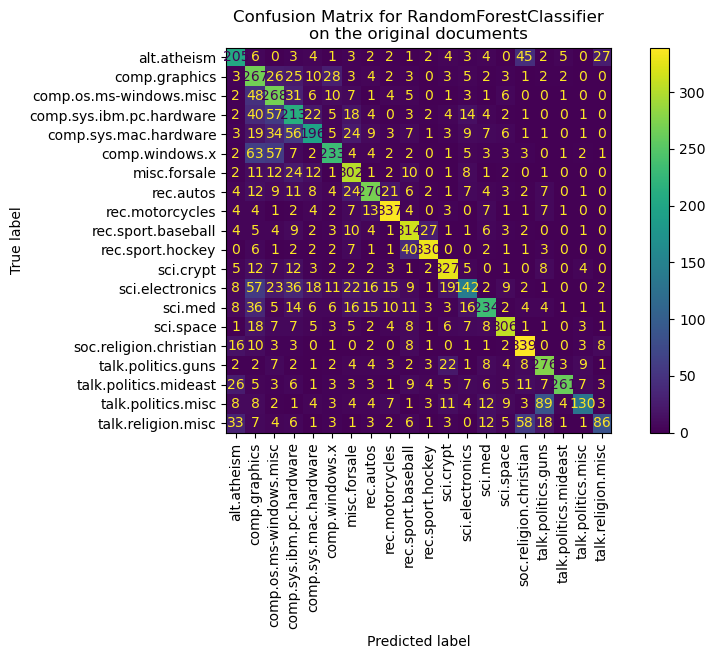

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

# Classification accuracy
acc = accuracy_score(y_test, pred)
print(f'Classification accuracy {acc:.2f}')

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(data_train.target_names)
ax.yaxis.set_ticklabels(data_train.target_names)
plt.xticks(rotation=90)
ax.set_title(f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")
plt.show()

### Detection

Detection is a special case of classification, but **do not** confuse detection with classification since the evaluation is very different.

 * [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (Wikipedia)


#### Tracking

Tracking is a special case of detection.

 * Demo: Python/opencv_tracker_webcam.py


## Regression

#### Demo: Boston house prices regression

A standard dataset for data analysis. The dataset provides 80 input variables of various type and one output variable (the house selling price). Pandas provides many tools for data analysis and Sklearn supports Pandas. 

In [ ]:
from sklearn.datasets import fetch_openml

df = fetch_openml(name="house_prices", as_frame=True, parser="pandas")
X = df.data
y = df.target
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

For simplicity let's take a small subset of the available input features. We also skip all categorial features as they would be needed to be converted to numerical.

In [ ]:
from sklearn.utils import shuffle
import numpy as np

features = [
        "YrSold",
#        "HeatingQC",
#        "Street",
        "YearRemodAdd",
#        "Heating",
#        "MasVnrType",
#        "BsmtUnfSF",
#        "Foundation",
        "MasVnrArea",
        "MSSubClass",
#        "ExterQual",
#        "Condition2",
        "GarageCars",
#        "GarageType",
        "OverallQual",
        "TotalBsmtSF",
        "BsmtFinSF1",
#        "HouseStyle",
#        "MiscFeature",
        "MoSold",
]

X = X.loc[:, features]
print(X.head())


X, y = shuffle(X, y, random_state=666)


X_train = X.iloc[:1000]
y_train = y.iloc[:1000]
X_test = X.iloc[1000:]
y_test = y.iloc[1000:]

X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

print(X_train.shape)
print(f'Mean price (training): {np.mean(y_train)}')

print(X_test.shape)
print(f'Mean price (test): {np.mean(y_test)}')

Sanity check baseline

In [ ]:
from sklearn import metrics

y_pred = np.ones(y_test.shape)*np.mean(y_train)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Baseline - linear regression (fails, but why?)

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.squeeze(X_train), np.squeeze(y_train))

# Make predictions using the testing set
y_pred = regr.predict(X_test)

Let's use Pandas style to replace missing values and re-do our stuff.

In [ ]:
print(np.argwhere(np.isnan(X_train)))
print(X_train[102,:])

In [ ]:
X_pure = X.apply(lambda x: x.fillna(x.mean()), axis=0)

X_train = X_pure.iloc[:1000]
X_test = X_pure.iloc[1000:]

X_train=X_train.values
X_test=X_test.values

print(np.argwhere(np.isnan(X_train)))
print(X_train[102,:])
print(np.mean(X_train[:,2]))

Redo the baseline (linear regression)

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.squeeze(X_train), np.squeeze(y_train))

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(np.squeeze(X_train), np.squeeze(y_train))
y_pred = regr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

## Clustering & other unsupervised learning

Unsupervised ML not included to this course, but discussed in DATA.ML.100 and in other data analysis courses.

## Reinforcement learning

Part of this course. We go more advanced that the basics in DATA.ML.100

## References

 * DATA.ML.100